In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | eyl
Processing Record 4 of Set 1 | pasni
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | manama
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | alto araguaia
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | uruguaiana
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | las vegas
Processing Record 19 of Set 1 | pacific grove
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | mahebourg
P

Processing Record 35 of Set 4 | waitati
Processing Record 36 of Set 4 | porto novo
Processing Record 37 of Set 4 | carballo
Processing Record 38 of Set 4 | verkhnevilyuysk
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | vanimo
Processing Record 41 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | dromolaxia
Processing Record 43 of Set 4 | atherton
Processing Record 44 of Set 4 | buon me thuot
City not found. Skipping...
Processing Record 45 of Set 4 | mecca
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | barranca
Processing Record 48 of Set 4 | aykhal
Processing Record 49 of Set 4 | bagdarin
Processing Record 50 of Set 4 | marawi
Processing Record 1 of Set 5 | kerman
Processing Record 2 of Set 5 | ballina
Processing Record 3 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | nanortalik
Processing 

Processing Record 20 of Set 8 | naze
Processing Record 21 of Set 8 | changzhou
Processing Record 22 of Set 8 | savannah bight
Processing Record 23 of Set 8 | gorontalo
Processing Record 24 of Set 8 | coahuayana
Processing Record 25 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 26 of Set 8 | zaria
Processing Record 27 of Set 8 | umm lajj
Processing Record 28 of Set 8 | port-cartier
Processing Record 29 of Set 8 | sorvag
City not found. Skipping...
Processing Record 30 of Set 8 | axim
Processing Record 31 of Set 8 | kautokeino
Processing Record 32 of Set 8 | amapa
Processing Record 33 of Set 8 | kasongo-lunda
Processing Record 34 of Set 8 | dalvik
Processing Record 35 of Set 8 | renigunta
Processing Record 36 of Set 8 | odemis
City not found. Skipping...
Processing Record 37 of Set 8 | weihai
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | taunggyi
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | gisb

Processing Record 4 of Set 12 | sinnar
Processing Record 5 of Set 12 | burkhala
City not found. Skipping...
Processing Record 6 of Set 12 | kassala
Processing Record 7 of Set 12 | grand baie
Processing Record 8 of Set 12 | sechura
Processing Record 9 of Set 12 | yeniseysk
Processing Record 10 of Set 12 | bay roberts
Processing Record 11 of Set 12 | iwanai
Processing Record 12 of Set 12 | muros
Processing Record 13 of Set 12 | teya
Processing Record 14 of Set 12 | constantine
Processing Record 15 of Set 12 | kazachinskoye
Processing Record 16 of Set 12 | nefteyugansk
Processing Record 17 of Set 12 | merauke
Processing Record 18 of Set 12 | tocopilla
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | renqiu
Processing Record 21 of Set 12 | nyurba
Processing Record 22 of Set 12 | kushima
Processing Record 23 of Set 12 | luena
Processing Record 24 of Set 12 | olafsvik
Processing Record 25 of Set 12 | tricase
Processing Record 26 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,58.66,75,2,13.09,ZA,2022-04-05 23:34:17
1,Yar-Sale,66.8333,70.8333,28.51,97,100,26.73,RU,2022-04-05 23:34:44
2,Eyl,7.9803,49.8164,77.67,75,8,6.49,SO,2022-04-05 23:34:45
3,Pasni,25.2631,63.4710,79.03,53,6,9.06,PK,2022-04-05 23:34:45
4,Ribeira Grande,38.5167,-28.7000,60.73,86,62,13.60,PT,2022-04-05 23:34:45
5,Yellowknife,62.4560,-114.3525,31.41,74,100,10.36,CA,2022-04-05 23:33:10
6,Busselton,-33.6500,115.3333,59.07,69,26,8.99,AU,2022-04-05 23:34:46
7,Manama,26.2154,50.5832,77.34,49,0,2.30,BH,2022-04-05 23:34:46
8,Nikolskoye,59.7035,30.7861,27.72,75,92,13.00,RU,2022-04-05 23:34:46
9,Alto Araguaia,-17.3147,-53.2153,71.56,73,6,2.75,BR,2022-04-05 23:34:46


In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-04-05 23:34:17,-34.5322,20.0403,58.66,75,2,13.09
1,Yar-Sale,RU,2022-04-05 23:34:44,66.8333,70.8333,28.51,97,100,26.73
2,Eyl,SO,2022-04-05 23:34:45,7.9803,49.8164,77.67,75,8,6.49
3,Pasni,PK,2022-04-05 23:34:45,25.2631,63.4710,79.03,53,6,9.06
4,Ribeira Grande,PT,2022-04-05 23:34:45,38.5167,-28.7000,60.73,86,62,13.60


In [17]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

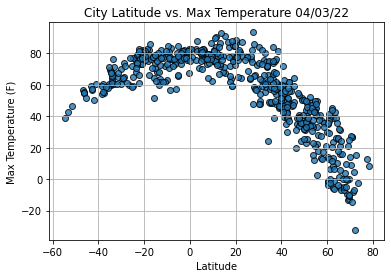

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Assets/Fig1.png")

# Show plot.
plt.show()

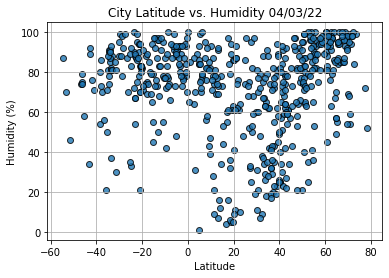

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Assets/Fig2.png")
# Show plot.
plt.show()

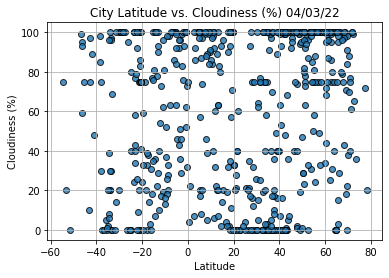

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Assets/Fig3.png")
# Show plot.
plt.show()

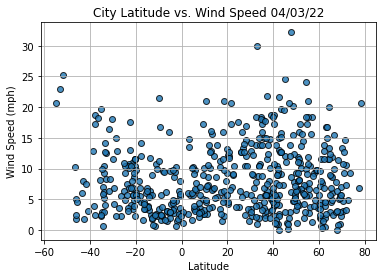

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Assets/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                      Talnakh
Country                        RU
Date          2022-04-03 21:56:51
Lat                       69.4865
Lng                       88.3972
Max Temp                    -0.17
Humidity                       97
Cloudiness                     84
Wind Speed                   6.93
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,El Estor,GT,2022-04-03 21:56:48,15.5333,-89.3500,90.88,44,20,5.30
1,Fortuna,US,2022-04-03 21:56:49,40.5982,-124.1573,59.94,65,0,17.27
4,Roald,NO,2022-04-03 21:56:49,62.5833,6.1333,38.75,100,100,4.61
5,Yellowknife,CA,2022-04-03 21:51:56,62.4560,-114.3525,23.41,63,75,13.80
6,Marsh Harbour,BS,2022-04-03 21:56:50,26.5412,-77.0636,76.48,75,35,15.95


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

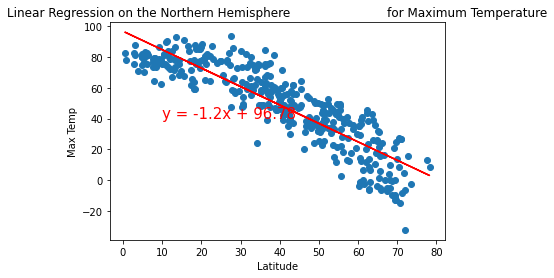

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

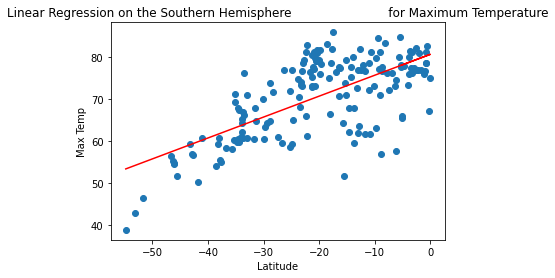

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

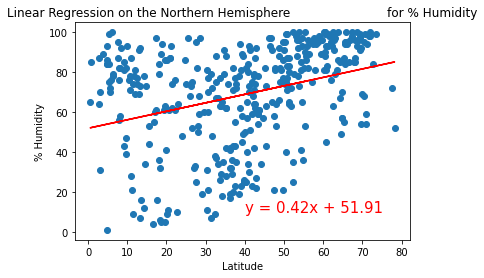

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

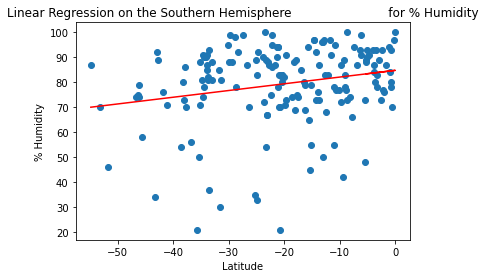

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

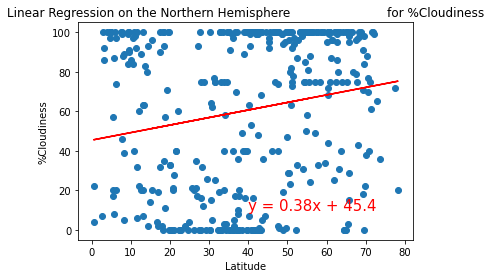

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '%Cloudiness',(40,10))

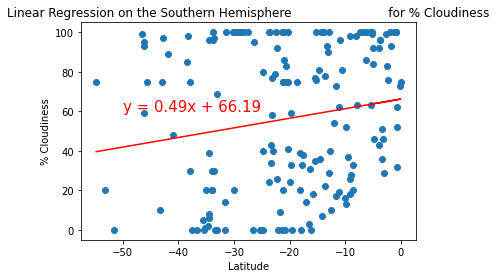

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

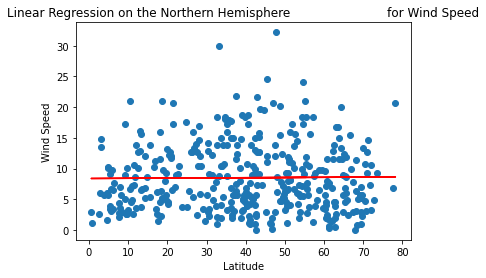

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

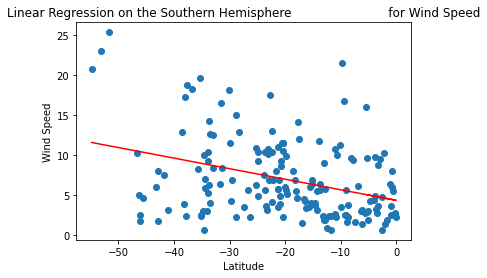

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))